In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# Compresión de los datos
## Recoleccion de los datos iniciales

Los datos utilizados son referentes a la calidad de la produccion de vinos. 


Los datos se obtuvieron de: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


## Descripción de los datos

Los datos se encuentran almacenados en archivos Excel (.csv) y se manipularan mediante Python.

In [2]:
wine=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

## Exploración de los datos

Utilizamos la función describe() para dar un primer vistazo a la informacion que tenemos.

In [3]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Verificar calidad de los datos



In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Prepación de los datos

El conjunto de datos consta de 1599 registros que representan los vinos producidos con 12 variables de las diferentes propiedades y la calidad de cada uno.

In [6]:
wine.shape  

(1599, 12)

## Selección de datos

Como no se tienen datos faltantes o erroneos, se utilizara el conjunto de datos completo en el modelo.


In [7]:
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

## Limpieza de datos 

Los datos no contienen datos corruptos que requieran ser removidos o remplazados.

## Construccion de los datos

Los datos ya se tienen estructurados


## Formateo de los datos



In [8]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
corr=wine.corr()

<AxesSubplot:>

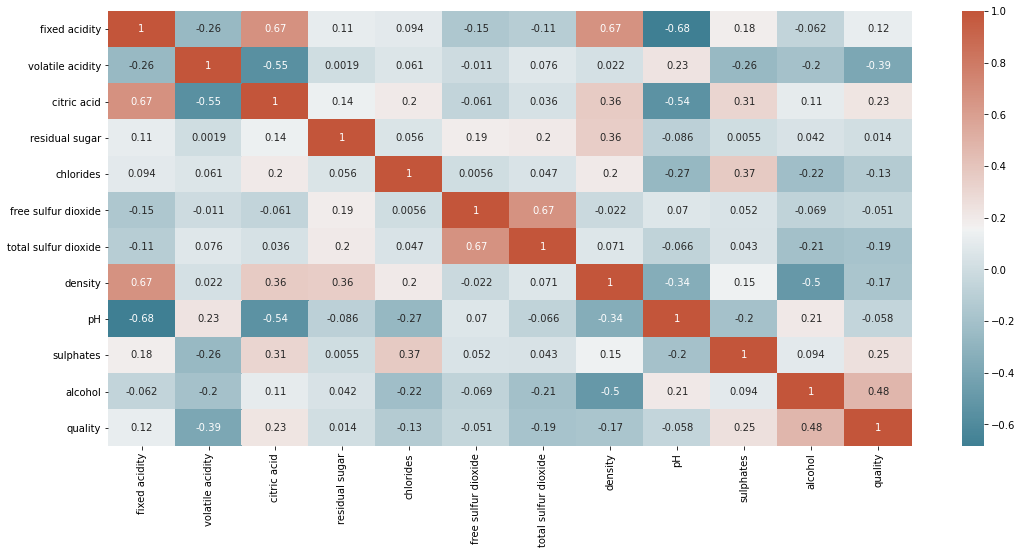

In [10]:
pyplot.subplots(figsize=(18, 8))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Agregamos una columna basada en el valor de la calidad con el siguiente filtro.


Menor o igual a 4: Low

5 o 6: Medium

7 u 8:High


In [11]:
bins = np.linspace(min(wine['quality']), max(wine['quality']), 4)
group_quality = ['Low', 'Medium', 'High']
wine['quality_binned'] = pd.cut(wine['quality'], bins, labels = group_quality, include_lowest=True)
wine[:10]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality quality_binned  
0      9.4        5         Medium  
1      9.8        5         Medium  
2      9.8        5         Medium  
3      9.8        6         Medium  
4      9.4        5         Medium  
5      9.4        5         Medium  
6      9.4        5         Medium  
7     10.0        7           High  
8      9.5        7           High  
9     10.5        5         Medium

In [12]:
wine['quality_binned'].value_counts()

Medium    1319
High       217
Low         63
Name: quality_binned, dtype: int64

In [13]:
fig=px.histogram( data_frame=wine,
            x=wine['quality'],
            color=wine['quality'])
fig.show()

In [14]:
fig=px.histogram( data_frame=wine,
            x=wine['quality_binned'],
            color=wine['quality_binned'])
fig.show()

#### En base a las observaciones de correlación analisamos la cantidad de alcohol en relacion a la calidad

<AxesSubplot:xlabel='alcohol', ylabel='quality_binned'>

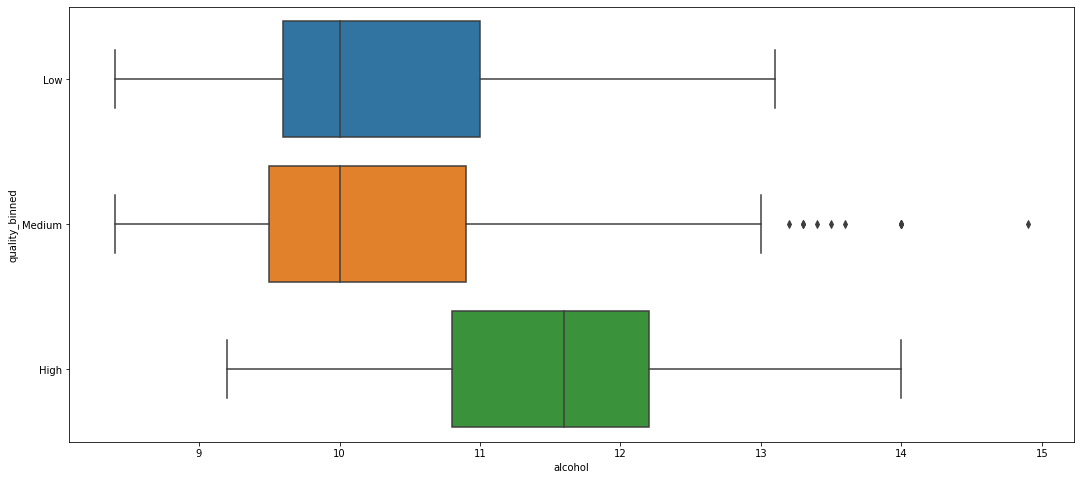

In [15]:
pyplot.subplots(figsize=(18, 8))
sns.boxplot(x = 'alcohol', y = 'quality_binned', data = wine)

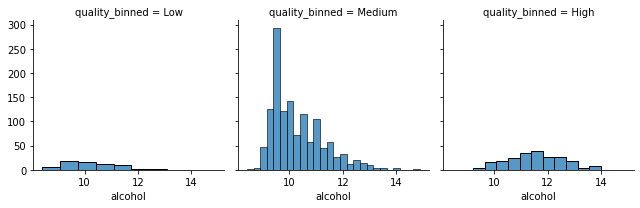

In [16]:
grid = sns.FacetGrid(wine, col= 'quality_binned')
grid.map(sns.histplot, 'alcohol')

<AxesSubplot:xlabel='sulphates', ylabel='quality_binned'>

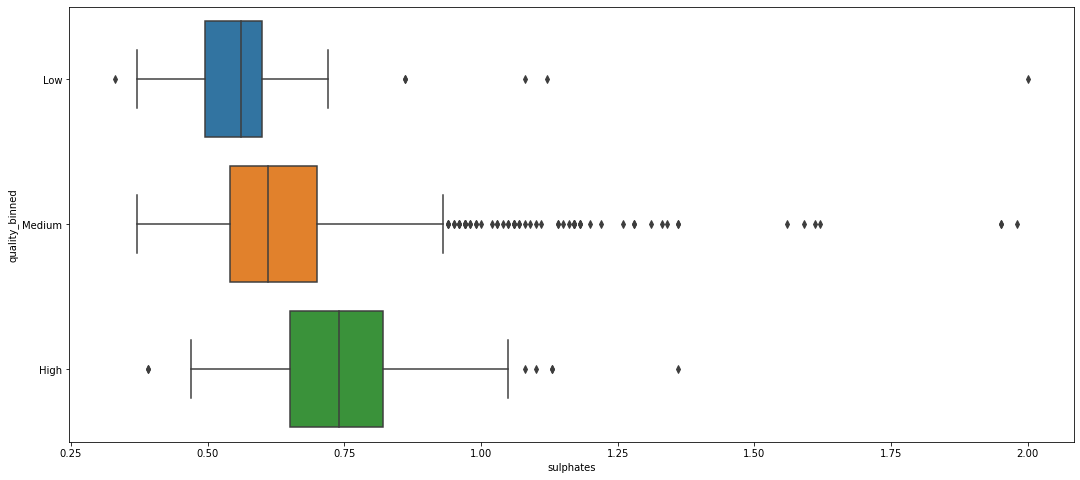

In [17]:
pyplot.subplots(figsize=(18,8))
sns.boxplot(x = 'sulphates', y = 'quality_binned', data = wine)

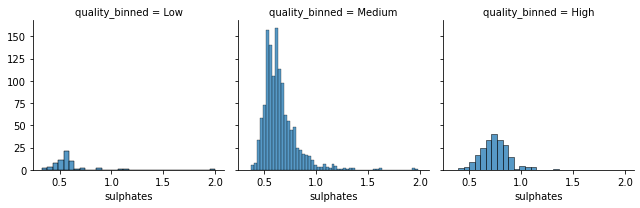

In [18]:
grid = sns.FacetGrid(wine, col= 'quality_binned')
grid.map(sns.histplot, 'sulphates')

<AxesSubplot:xlabel='citric acid', ylabel='quality_binned'>

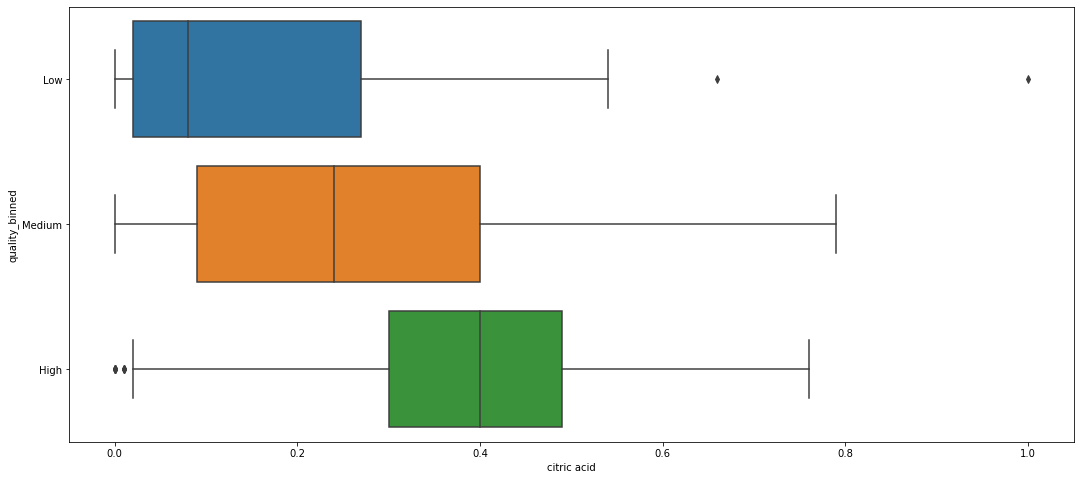

In [19]:
pyplot.subplots(figsize=(18, 8))
sns.boxplot(x = 'citric acid', y = 'quality_binned', data = wine)

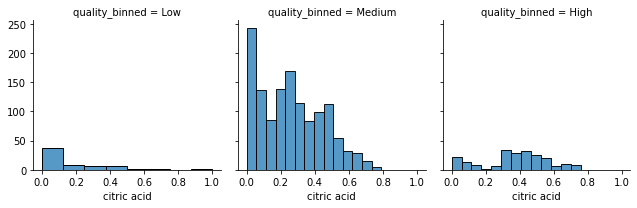

In [20]:
grid = sns.FacetGrid(wine, col= 'quality_binned')
grid.map(sns.histplot, 'citric acid')

<AxesSubplot:xlabel='volatile acidity', ylabel='quality_binned'>

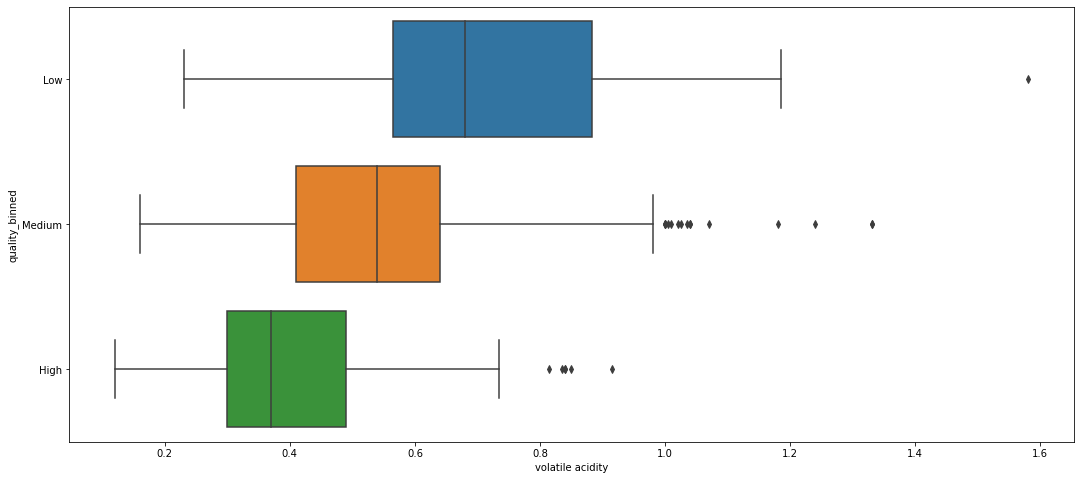

In [21]:
pyplot.subplots(figsize=(18, 8))
sns.boxplot(x = 'volatile acidity', y = 'quality_binned', data = wine)

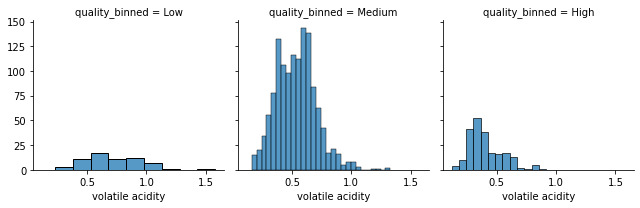

In [22]:
grid = sns.FacetGrid(wine, col= 'quality_binned')
grid.map(sns.histplot, 'volatile acidity')

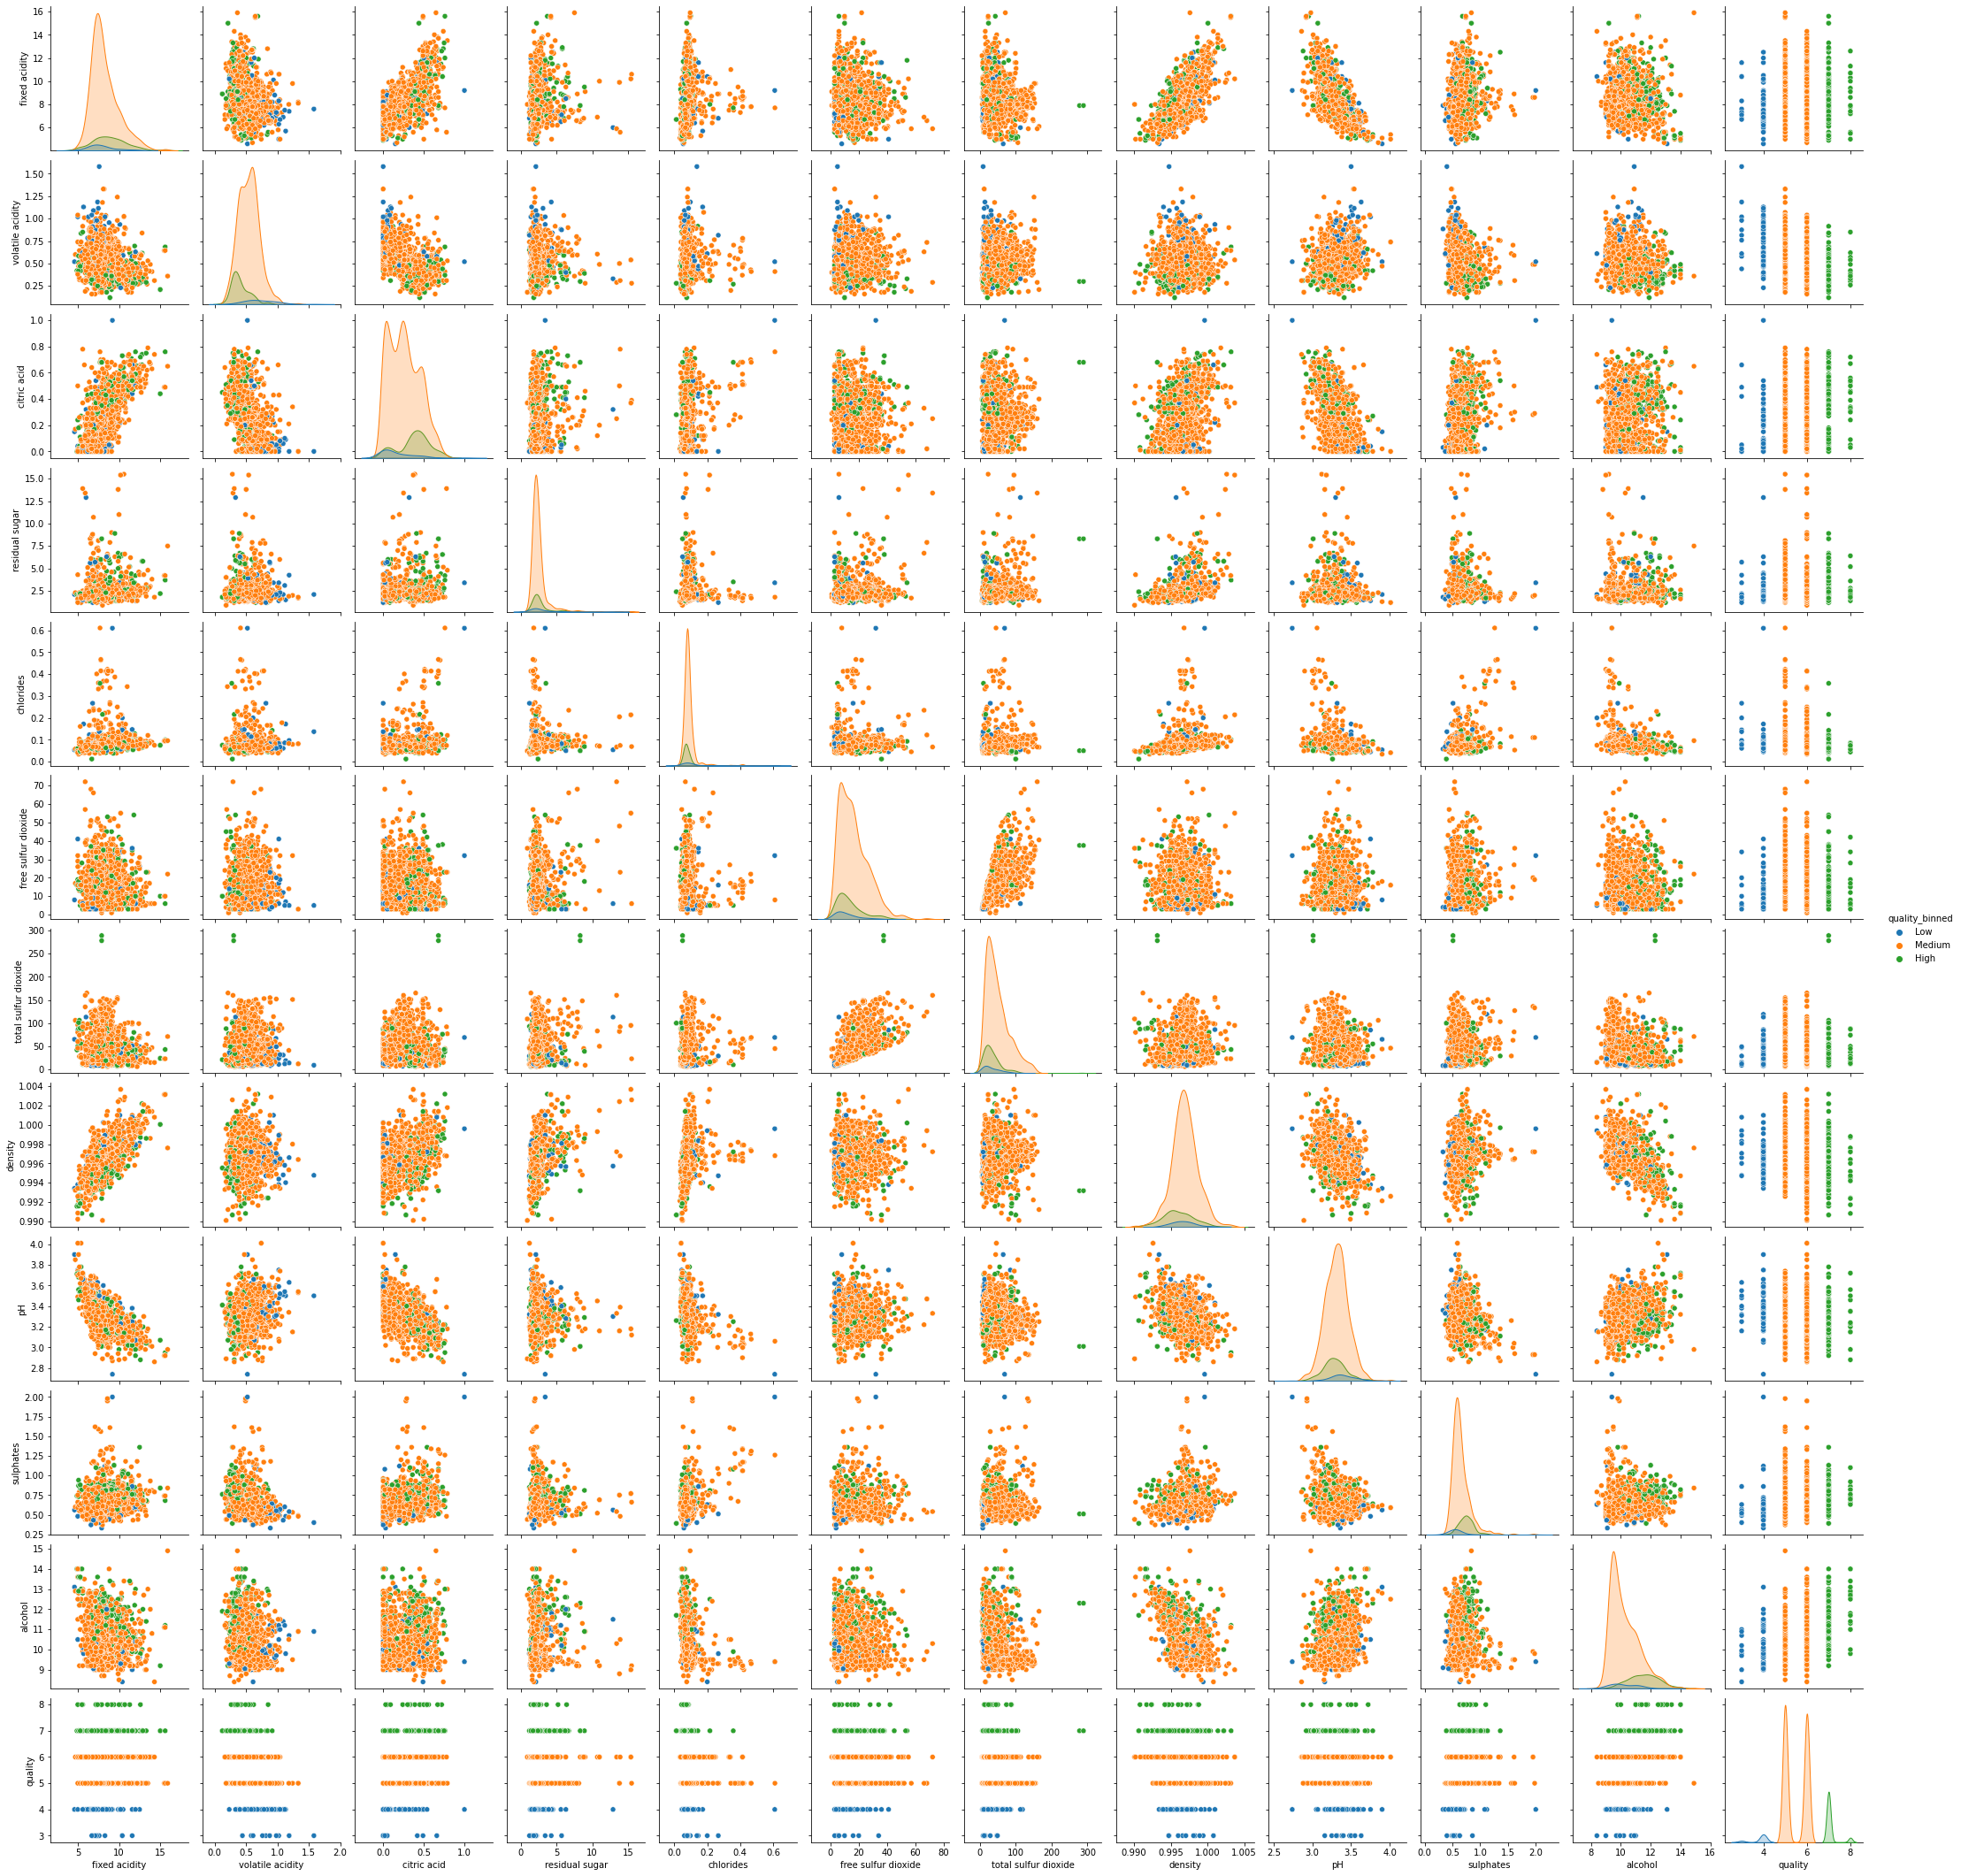

In [23]:
sns.pairplot(wine, hue= 'quality_binned', height= 2.5)


In [24]:
wine.to_csv('wineEDA.csv', sep=",")

## Conclusiones

Por Adilene Calderón, Aaron Lara, Adrían Vázquez. Introducción a la Ciencia de Datos y sus Metodologías. [MCD UNISON](https://mcd.unison.mx)

## Referencias
I_Prerna_Kalura(2021). Breast cancer solution. https://www.kaggle.com/iprernakalura/breast-cancer-solution

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://scikit-learn.org/stable/modules/tree.html

https://www.kaggle.com/madhurisivalenka/basic-machine-learning-with-red-wine-quality-data
